# Implementation Assignment 1 by Akshay Shinde `933589936`, Parijat Bhatt `933619125`, Uday Phalak `933232441`
`Equal participation by all team mates`

# setup

In [155]:
#setting up packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = [20,10]
train_data_source = "PA1_train.csv.xls"
validation_data_source = "PA1_dev.csv.xls"
test_data_source = "PA1_test.csv.xls"

In [156]:
#load training data
df_original = pd.read_csv(train_data_source)
df_original.sample(5)

,dummy,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
488,1,240000031,3/13/2015,4,2.25,1940,10200,1.0,0,0,...,1360,580,1960,0,98188,47.4253,-122.283,1940,10200,3.220
1479,1,3905010100,6/15/2014,4,2.50,2700,9122,2.0,0,0,...,2700,0,1990,0,98029,47.5771,-121.994,2500,9122,6.525
6210,1,7504010780,12/26/2014,4,2.25,2260,11900,2.0,0,0,...,2260,0,1976,0,98074,47.6415,-122.057,2470,11900,6.050
5941,1,9476700135,3/19/2015,3,1.75,1500,8352,1.0,0,2,...,750,750,1943,0,98056,47.4883,-122.191,1500,8447,3.000
2389,1,2856100250,11/6/2014,4,2.50,2470,2550,3.0,0,0,...,2470,0,2004,0,98117,47.6765,-122.389,1270,3060,7.350


# correlation matrix

In [157]:
corr = df_original.corr()
corr

,dummy,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
dummy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,NaN,1.000000,0.009571,0.013088,-0.003695,-0.126239,0.015749,-0.006859,0.007224,-0.028498,...,-0.005744,0.003230,0.030323,-0.020651,-0.013230,-0.000096,0.022089,-0.002148,-0.124169,-0.014748
bedrooms,NaN,0.009571,1.000000,0.492908,0.566724,0.026586,0.171673,-0.009237,0.082935,0.027587,...,0.468981,0.291525,0.153975,0.011714,-0.151854,-0.014800,0.135611,0.387012,0.025704,0.304994
bathrooms,NaN,0.013088,0.492908,1.000000,0.753826,0.077894,0.514202,0.044960,0.189175,-0.132256,...,0.688100,0.264985,0.515811,0.028823,-0.204217,0.014722,0.230576,0.575767,0.087405,0.524480
sqft_living,NaN,-0.003695,0.566724,0.753826,1.000000,0.172406,0.359159,0.080323,0.281434,-0.059997,...,0.879322,0.415481,0.325948,0.030222,-0.199869,0.037184,0.252701,0.767427,0.187928,0.693156
sqft_lot,NaN,-0.126239,0.026586,0.077894,0.172406,1.000000,-0.003914,0.030918,0.093269,-0.007812,...,0.185731,0.006441,0.053269,0.008237,-0.127988,-0.091396,0.221079,0.145951,0.766928,0.090327
floors,NaN,0.015749,0.171673,0.514202,0.359159,-0.003914,1.000000,0.019322,0.032063,-0.263973,...,0.525619,-0.251502,0.491236,-0.001851,-0.064221,0.047280,0.133802,0.285700,-0.014699,0.265757
waterfront,NaN,-0.006859,-0.009237,0.044960,0.080323,0.030918,0.019322,1.000000,0.387081,0.026360,...,0.060511,0.052698,-0.037503,0.061097,0.039637,-0.019403,-0.048597,0.075997,0.023875,0.222654
view,NaN,0.007224,0.082935,0.189175,0.281434,0.093269,0.032063,0.387081,1.000000,0.054153,...,0.168429,0.267902,-0.054604,0.091935,0.077631,-0.003251,-0.072904,0.273224,0.073885,0.392961
condition,NaN,-0.028498,0.027587,-0.132256,-0.059997,-0.007812,-0.263973,0.026360,0.054153,1.000000,...,-0.154599,0.169593,-0.371877,-0.056667,0.015185,-0.000121,-0.117979,-0.095066,-0.003873,0.051306


# Part 0

## 0 a:

In [158]:
#removing id feature
df = df_original.drop(["id"], 1)
df.sample(5)

,dummy,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
3329,1,9/24/2014,3,1.00,890,9465,1.0,0,0,3,...,890,0,1957,0,98148,47.4388,-122.328,1590,9147,1.545
5575,1,5/2/2014,3,2.50,3240,33151,2.0,0,2,3,...,3240,0,1995,0,98023,47.3256,-122.378,4050,24967,6.040
5729,1,5/9/2014,3,1.75,1780,120661,1.0,0,0,4,...,1780,0,1979,0,98019,47.7731,-121.897,1440,25000,3.369
6938,1,10/30/2014,3,2.75,1820,9490,2.0,0,0,3,...,1820,0,1994,0,98011,47.7481,-122.178,1950,8851,4.885
7980,1,2/13/2015,4,1.75,1790,45738,1.0,0,0,3,...,1410,380,1976,0,98072,47.7453,-122.129,1870,47480,4.550


Since the **id** feature works as an **identifier** for the datapoint and is **not related to the price** of the houses, it is a bad idea to use it in learning. We can see that the [Correlation](#correlation-matrix) for id and price is `-0.028` which is low compared to other correlations

## 0 b:

In [159]:
#setup
df_original["date"] = pd.to_datetime(df_original["date"])
df_original["month_of_year"] = df_original['date'].apply(lambda x: x.month)
df_original["day_of_month"] = df_original['date'].apply(lambda x: x.day)
df_original["year"] = df_original['date'].apply(lambda x: x.year)


## splitting date into month day and year

In [160]:
df_original[["date", "month_of_year", "day_of_month", "year"]].sample(5)

,date,month_of_year,day_of_month,year
6621,2014-08-11,8,11,2014
1475,2014-05-27,5,27,2014
8307,2014-07-18,7,18,2014
5377,2014-08-27,8,27,2014
3954,2014-07-28,7,28,2014


Text(0, 0.5, 'price')

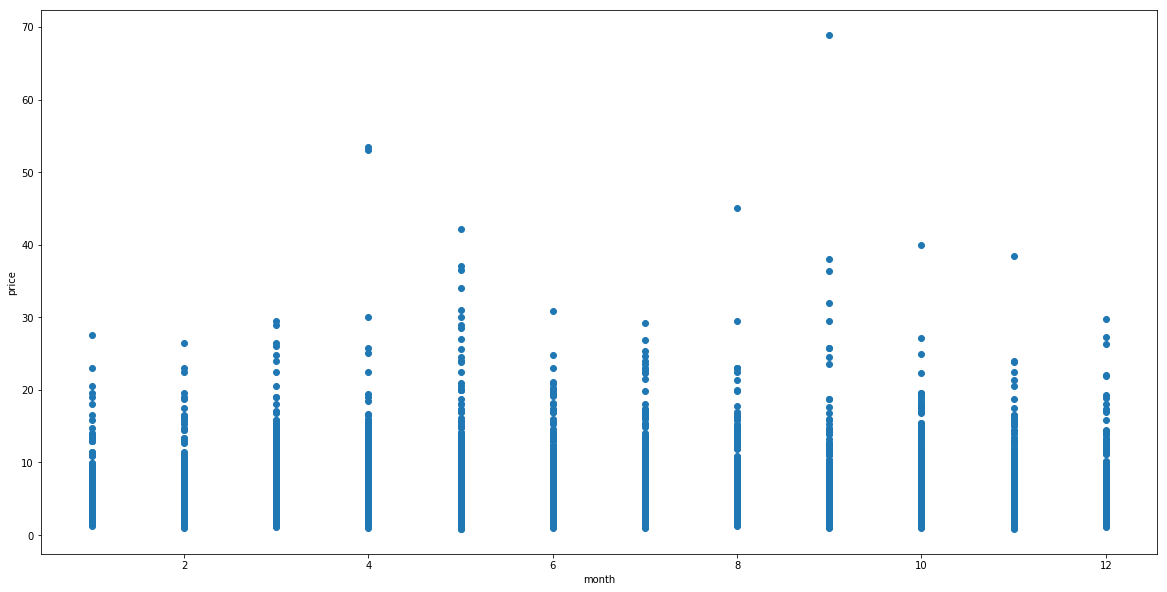

In [204]:
plt.scatter(df_original["month_of_year"], df_original["price"])
plt.xlabel("month")
plt.ylabel("price")

Here in the above `figure` we can see that the month feature retrieved from date can give us insights about the **effect of seasons** on the house prices. Therefore the date feature can be useful to extract such information.

## 0 c:

In [162]:
#helper functions
def stats(dataframe):
    stats = dataframe.describe()
    stats = stats.drop(["count", "25%", "50%", "75%",], 0)
    stats.loc["range"] = stats.loc["max"] - stats.loc["min"]
    return stats

def ordinal_stats(dataframe):
    args = dataframe.columns.tolist()
    stats = dataframe.describe()
    frequency = [pd.Series((dataframe[x].value_counts() / dataframe[x].count())*100) for x in args]
    return pd.DataFrame(frequency)

## ordinal data stats

In [163]:
df_ordinal = df[["waterfront","grade","condition"]]
ordinal_stats(df_ordinal)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
waterfront,99.3,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,NaN,NaN,NaN,NaN,0.11,1.05,9.33,41.3,28.38,11.82,5.47,2.1,0.39,0.05
condition,NaN,0.13,0.76,65.3,25.69,8.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## numerical data stats

In [164]:
df_non_ordinal = df.drop(["waterfront","grade","condition"], 1)
stats(df_non_ordinal)

,dummy,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
mean,1.0,3.375200,2.118875,2080.223200,1.508920e+04,1.503700,0.229400,1793.099300,287.123900,1971.124900,81.226700,98078.293100,47.559814,-122.213286,1994.326100,12746.323400,5.385297
std,0.0,0.943246,0.765128,911.334358,4.120389e+04,0.542647,0.755932,830.865434,435.005264,29.480594,394.379804,53.518391,0.138651,0.141405,691.900301,28241.243043,3.573901
min,1.0,1.000000,0.500000,370.000000,5.720000e+02,1.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,460.000000,660.000000,0.820000
max,1.0,33.000000,7.750000,9890.000000,1.651359e+06,3.500000,4.000000,8860.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,6110.000000,871200.000000,68.900000
range,0.0,32.000000,7.250000,9520.000000,1.650787e+06,2.500000,4.000000,8490.000000,2720.000000,115.000000,2015.000000,198.000000,0.621700,1.195000,5650.000000,870540.000000,68.080000


## 0 d:

Based on the meaning of the features as well as the statistics observed in [Correlation matrix](#correlation-matrix), the following features seem to have greater significance<br/>
**'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view','grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'**<br/>
Additionally, we can use the **zipcode** feature which can give us information if the location of the house affects the price of the house.

Text(0, 0.5, 'price')

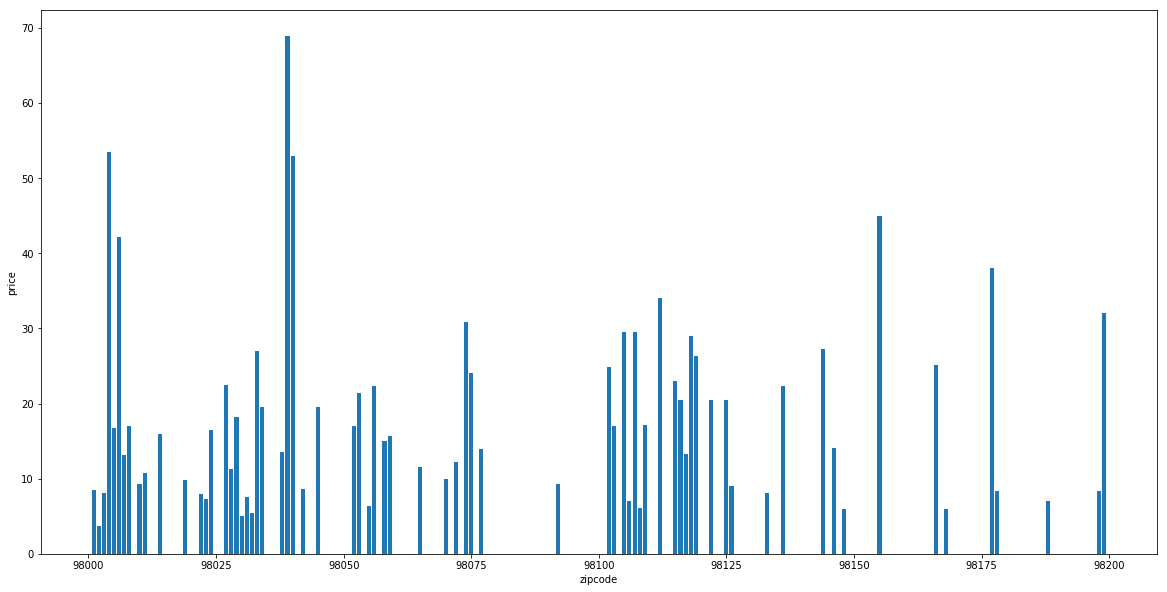

In [205]:
plt.rcParams["figure.figsize"] = [20,10]
plt.bar(df_original["zipcode"], df_original["price"])
plt.xlabel("zipcode")
plt.ylabel("price")

From the `above figure`, we can observe that the price of houses are high for certain zipcodes.

`Few examples of high correlation features`

## bedrooms

<BarContainer object of 10000 artists>

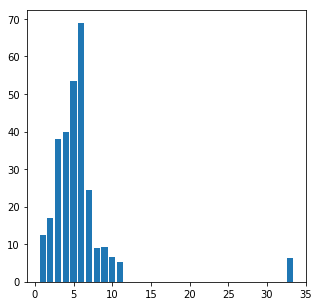

In [166]:
plt.rcParams["figure.figsize"] = [5,5]
plt.bar(df_original["bedrooms"], df_original["price"])

## bathrooms

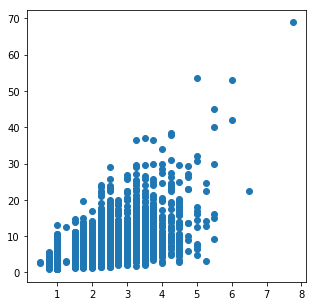

In [167]:
plt.scatter(df_original["bathrooms"], df_original["price"])

## floors

<BarContainer object of 10000 artists>

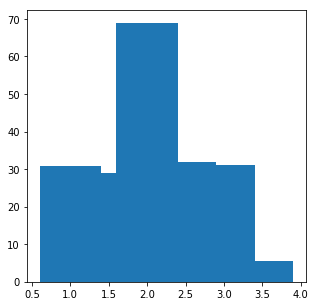

In [168]:
plt.bar(df_original["floors"], df_original["price"])

## view

<BarContainer object of 10000 artists>

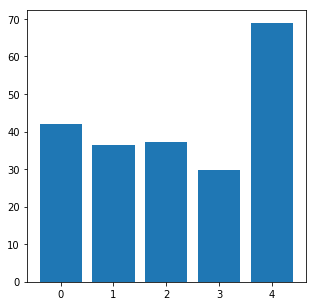

In [169]:
plt.bar(df_original["view"], df_original["price"])

## 0 e:

In [170]:
#selecting useful features
df = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
      'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']]

In [172]:
#saving non_normalized data for future use
non_normalized_df = df
non_normalized_df["dummy"] = df_original["dummy"]

In [173]:
#normalizing dataframe
df = (df - df.min()) / (df.max() - df.min())
df.sample(5)

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15,dummy
3726,0.09375,0.275862,0.288866,0.4,0.0,0.0,0.555556,0.323910,0.0,0.665916,0.299115,NaN
2291,0.09375,0.068966,0.193277,0.4,0.0,0.0,0.444444,0.216726,0.0,0.731221,0.226549,NaN
1317,0.03125,0.068966,0.056723,0.0,0.0,0.0,0.222222,0.063604,0.0,0.594177,0.176991,NaN
8435,0.03125,0.068966,0.044118,0.0,0.0,0.0,0.222222,0.049470,0.0,0.978768,0.267257,NaN
6087,0.09375,0.275862,0.151261,0.4,0.0,0.0,0.333333,0.169611,0.0,0.317195,0.230088,NaN


In [174]:
#adding dummy back to df
df["dummy"] = df_original["dummy"]

## result

In [175]:
df.sample(5)

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15,dummy
9857,0.12500,0.241379,0.272059,0.0,0.0,0.5,0.444444,0.138987,0.518382,0.787679,0.424779,1
8313,0.06250,0.206897,0.121849,0.0,0.0,0.0,0.333333,0.136631,0.000000,0.227602,0.228319,1
9823,0.09375,0.241379,0.161765,0.0,0.0,0.0,0.444444,0.107185,0.231618,0.916841,0.247788,1
9169,0.06250,0.344828,0.105042,0.8,0.0,0.0,0.444444,0.117786,0.000000,0.923757,0.166195,1
351,0.09375,0.275862,0.181723,0.8,0.0,0.0,0.444444,0.142521,0.191176,0.702751,0.182301,1


# Part 1

## 1 a:

**10^−4, 10^−5, 10^−6, 10^−7** learning rates are good for this particular dataset.<br/>
**10^0, 10^−1, 10^−2, 10^−3** make the gradient descent explode.

In [176]:
#helper functions
all_info = {}
def check_explode(norm):
    does_explode = True
    for i in range(1,len(norm)-1):
        if norm[i]<norm[i-1]:
            does_explode = False
    return does_explode

def calculate_weights_and_sse(learning_rate,max_iteration,check_iter_for_explode, df=df, all_info = all_info):
    weight = np.array(np.random.randn(1,12)[0])
    number_of_iteration = 0
    sse_for_each_iter = [] 
    norm_for_this_lr = []
    while True:
        diff_in_y = df.dot(weight)-y_train
        gradient = (np.transpose(df)).dot(diff_in_y)
        weight = weight - learning_rate*gradient
        sse = (np.transpose(diff_in_y)).dot(diff_in_y)
        norm_for_gradient = math.sqrt(gradient.dot(gradient))
        #print('number of iteration',number_of_iteration,norm_for_gradient,'   sse =',sse)
        sse_for_each_iter.append(sse)
        norm_for_this_lr.append(norm_for_gradient)
        number_of_iteration = number_of_iteration + 1
        if(norm_for_gradient<=0.5): 
            all_info[learning_rate] = {"whether converged":True,
                               "weights":weight,
                               "sse_for_each_iteration":sse_for_each_iter,
                               "number_of_iteration_used":number_of_iteration
                              }
            #print("########################")
            #print("number of itertion used for learning_rate =",learning_rate , " is ",number_of_iteration , 'and sse is ' ,sse)
            #print("########################")
            break
        if(number_of_iteration == check_iter_for_explode and check_explode(norm_for_this_lr)):
            
            #print('Gradient explodes for learning_rate =',learning_rate)
            all_info[learning_rate] = {"whether converged":False,
                               "weights":np.array(np.zeros(12)),
                               "sse_for_each_iteration":np.array([-1]*12),
                               "number_of_iteration_used":number_of_iteration
                              }
            break  
        if(number_of_iteration==max_iteration):
    
            all_info[learning_rate] = {"whether converged":True,
                               "weights":weight,
                               "sse_for_each_iteration":sse_for_each_iter,
                               "number_of_iteration_used":number_of_iteration
                              }
            #print("converges but takes too many iterations  for lambda =",learning_rate)
            break 
        #if (number_of_iteration%5000)==0:
            #print('number of iteration',number_of_iteration,norm_for_gradient,sse)
    #print('checked for learning rate = ',learning_rate," now returning")
    return

In [ ]:
#Calculating weights and SSE
y_train = df_original["price"]
lr = [1,0.1,0.01,0.001,0.0001]
for x in lr:
    print('doing everything for learning rate = ',x)
    calculate_weights_and_sse(x,200000,40)

## non converging SSE for learning rate 1

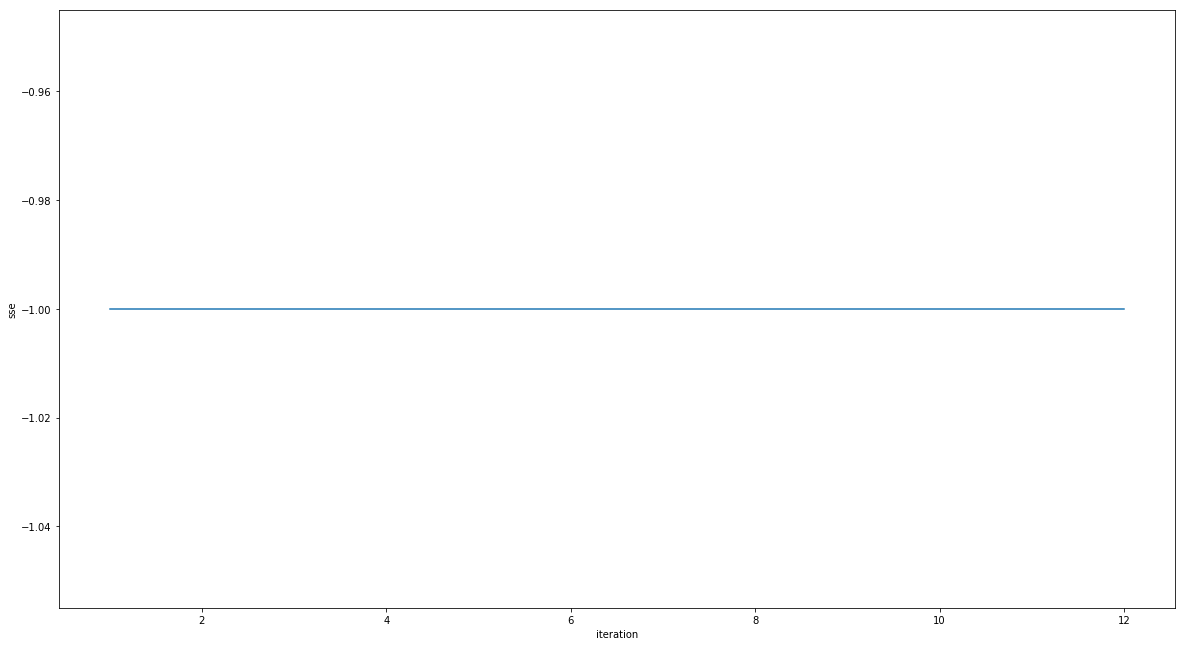

In [178]:
y=all_info[1]['sse_for_each_iteration']
iteration = np.array([x for x in range(1,len(y)+1)])
data = pd.DataFrame({'iteration':iteration ,'sse':np.array(y)})

a4_dims = (20, 11)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,x='iteration',y='sse',data=data,palette="husl")

## converging SSE for learning rate 10^-4

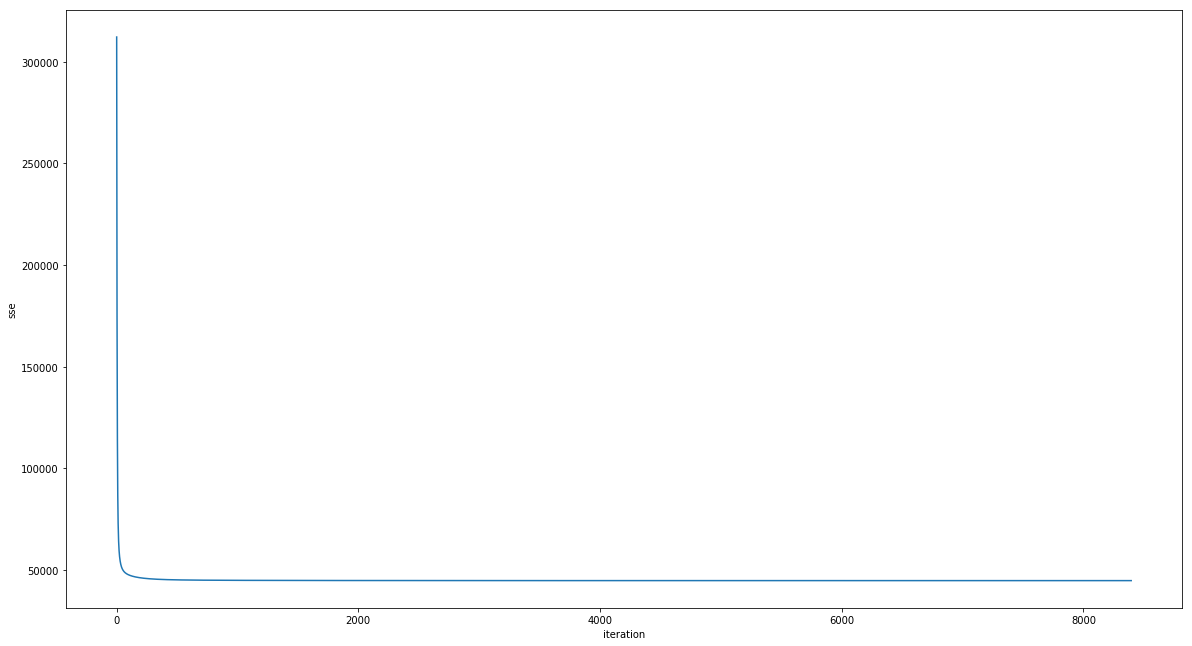

In [179]:
y=all_info[0.0001]['sse_for_each_iteration']
iteration = np.array([x for x in range(1,len(y)+1)])
data = pd.DataFrame({'iteration':iteration ,'sse':np.array(y)})

a4_dims = (20, 11)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,x='iteration',y='sse',data=data,palette="Set1")

## 1 b:

In [180]:
sse_comparison = pd.read_csv("ml1b.csv")
sse_comparison

,Learning rate,Training SSE,Training Iterations,Validation SSE
0,1.000000e-04,44811.77452,7985,42092.23353
1,1.000000e-05,44811.77454,82774,42392.65437
2,1.000000e-06,44848.30682,200000,31865.83941
3,1.000000e-07,45671.85670,200000,26098.74267


## plot of learning rate vs SSE for training

Text(0, 0.5, 'Training SSE')

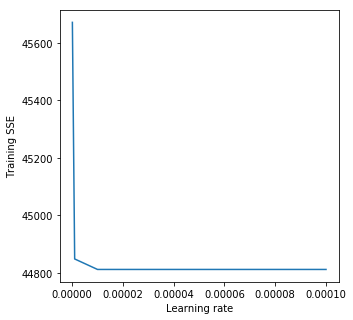

In [207]:
plt.rcParams["figure.figsize"] = [5,5]
plt.plot(sse_comparison["Learning rate"], sse_comparison["Training SSE"])
plt.xlabel("Learning rate")
plt.ylabel("Training SSE")

## plot of learning rate vs SSE for validation

Text(0, 0.5, 'Validation SSE')

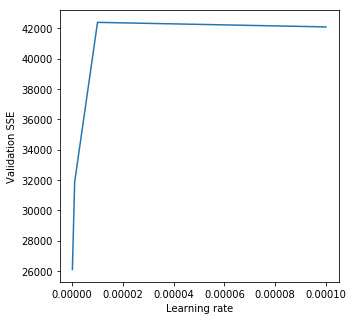

In [208]:
plt.rcParams["figure.figsize"] = [5,5]
plt.plot(sse_comparison["Learning rate"], sse_comparison["Validation SSE"])
plt.xlabel("Learning rate")
plt.ylabel("Validation SSE")

For learning rates 10^-4 and 10^-5 the model converged, but for learning rates 10^-6 and 10^-7 was converging slowly so we considered weights after 200000 iterations. The SSE for 10^-7 was minimum for validation data. Hence we choose **10^-7** as ideal learning rate. 

## 1 c:

## ideal weight vector

In [183]:
ideal_weight_vector = pd.read_csv("weight_1e-07.csv")
ideal_weight_vector

,Unnamed: 0,Unnamed: 1
0,weight,feature
1,-0.00301654808,bedrooms
2,1.043001265,bathrooms
3,5.849090878,sqft_living
4,-0.4348848174,floors
5,3.202633604,waterfront
6,3.384332146,view
7,7.468285264,grade
8,5.328632759,sqft_above
9,2.05764414,sqft_basement


## Observation

According to our observation the feature **grade** is most significant. The feature **sqft_living** and **sqft_above** are the next important features. This aligns with our previous results except for **bedrooms** where the actual importance was much lesser than we previously estimated

# Part 3

## Non normalized data

In [184]:
non_normalized_df.sample(5)

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15,dummy
1889,3,2.00,1660,1.0,0,0,7,1010,650,47.3298,1660,1
4437,4,2.50,2230,1.0,0,0,7,1650,580,47.4799,2090,1
5398,4,2.50,3070,2.0,0,0,8,3070,0,47.4899,2590,1
6193,4,3.75,3490,2.0,0,0,9,3490,0,47.5991,1810,1
5917,3,1.75,2270,2.0,0,0,8,2270,0,47.5350,2260,1


## Training model

In [193]:
all_not_normalized_info = {}
lr = [1, 0 , 0.001, 0.000001, 0.000000001, 0.000000000000001]
for x in lr:
    calculate_weights_and_sse(x,10000,40, non_normalized_df, all_not_normalized_info)

## SSE for learning rate 0.001

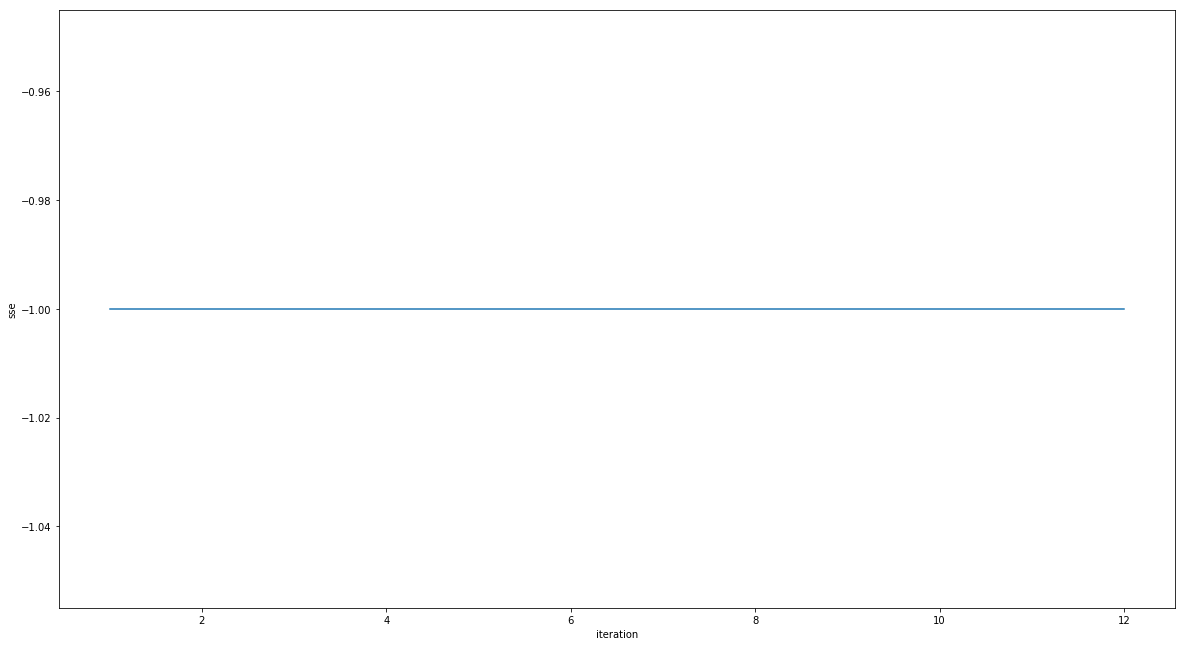

In [194]:
y=all_not_normalized_info[0.001]['sse_for_each_iteration']
iteration = np.array([x for x in range(1,len(y)+1)])
data = pd.DataFrame({'iteration':iteration ,'sse':np.array(y)})

a4_dims = (20, 11)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,x='iteration',y='sse',data=data,palette="husl")

## SSE for learning rate 0

For learning rate of 0, the weights will not change and the model will never converge unless the radomized weights are correctly predicted

## SSE for learning rate 1

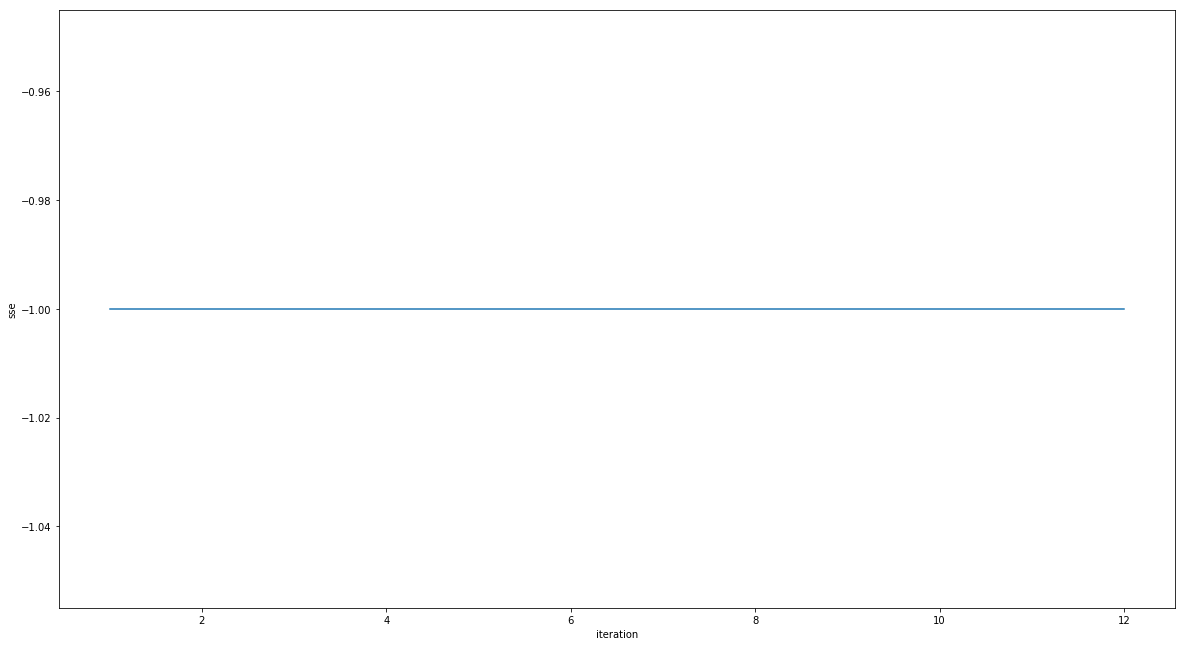

In [196]:
y=all_not_normalized_info[1]['sse_for_each_iteration']
iteration = np.array([x for x in range(1,len(y)+1)])
data = pd.DataFrame({'iteration':iteration ,'sse':np.array(y)})

a4_dims = (20, 11)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,x='iteration',y='sse',data=data,palette="husl")

## SSE for learning rate 0.000001

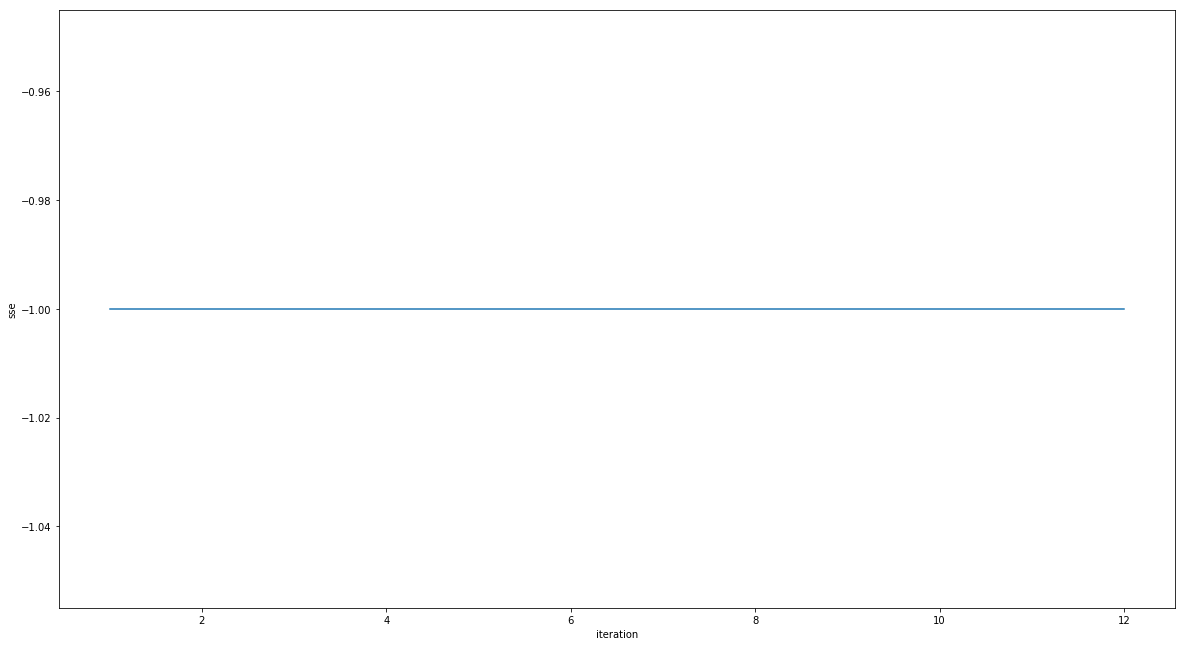

In [197]:
y=all_not_normalized_info[0.000001]['sse_for_each_iteration']
iteration = np.array([x for x in range(1,len(y)+1)])
data = pd.DataFrame({'iteration':iteration ,'sse':np.array(y)})

a4_dims = (20, 11)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,x='iteration',y='sse',data=data,palette="husl")

## SSE for learning rate 10^-15

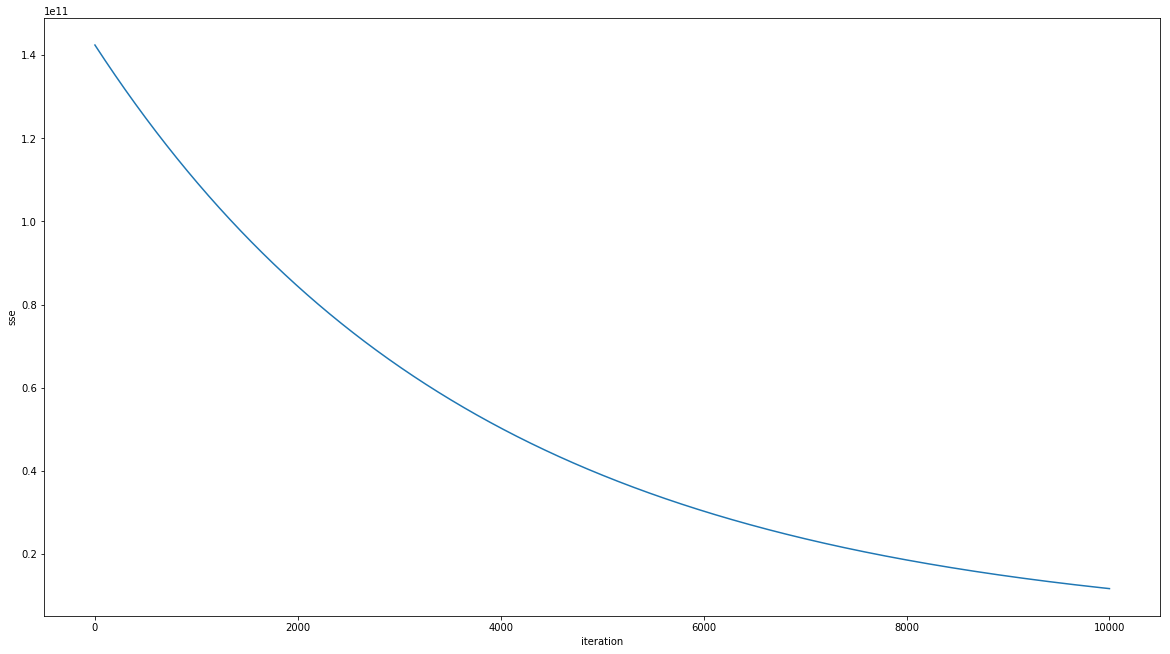

In [200]:
y=all_not_normalized_info[0.000000000000001]['sse_for_each_iteration']
iteration = np.array([x for x in range(1,len(y)+1)])
data = pd.DataFrame({'iteration':iteration ,'sse':np.array(y)})

a4_dims = (20, 11)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,x='iteration',y='sse',data=data,palette="husl")

In [234]:
validation_df = pd.read_csv(validation_data_source)
validation_df.sample(5)
weights = all_not_normalized_info[0.000000000000001]["weights"]
y = validation_df["price"]
validation_df = validation_df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
      'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15','dummy']]

## SSE for Validation data on non-normalized data

In [236]:
diff_in_y = validation_df.dot(weights)
sse = (np.transpose(diff_in_y)).dot(diff_in_y)
print(sse)

6592979080.296163


## SSE is `6592979080.296163`

Our observation is that SSE is decreasing only for the learning rate **10^-15**<br/><br/>
The learning rate of **10^-15** prevents the gradient descent from exploding<br/><br/>
Comparing between normalized and non-normalized data we find that it is easier to train on normalized data.<br/><br/>
Normalized data is easier to train because normalization reduces the magnitude of the numbers which prevents the numbers from overflowing.